Populating the interactive namespace from numpy and matplotlib


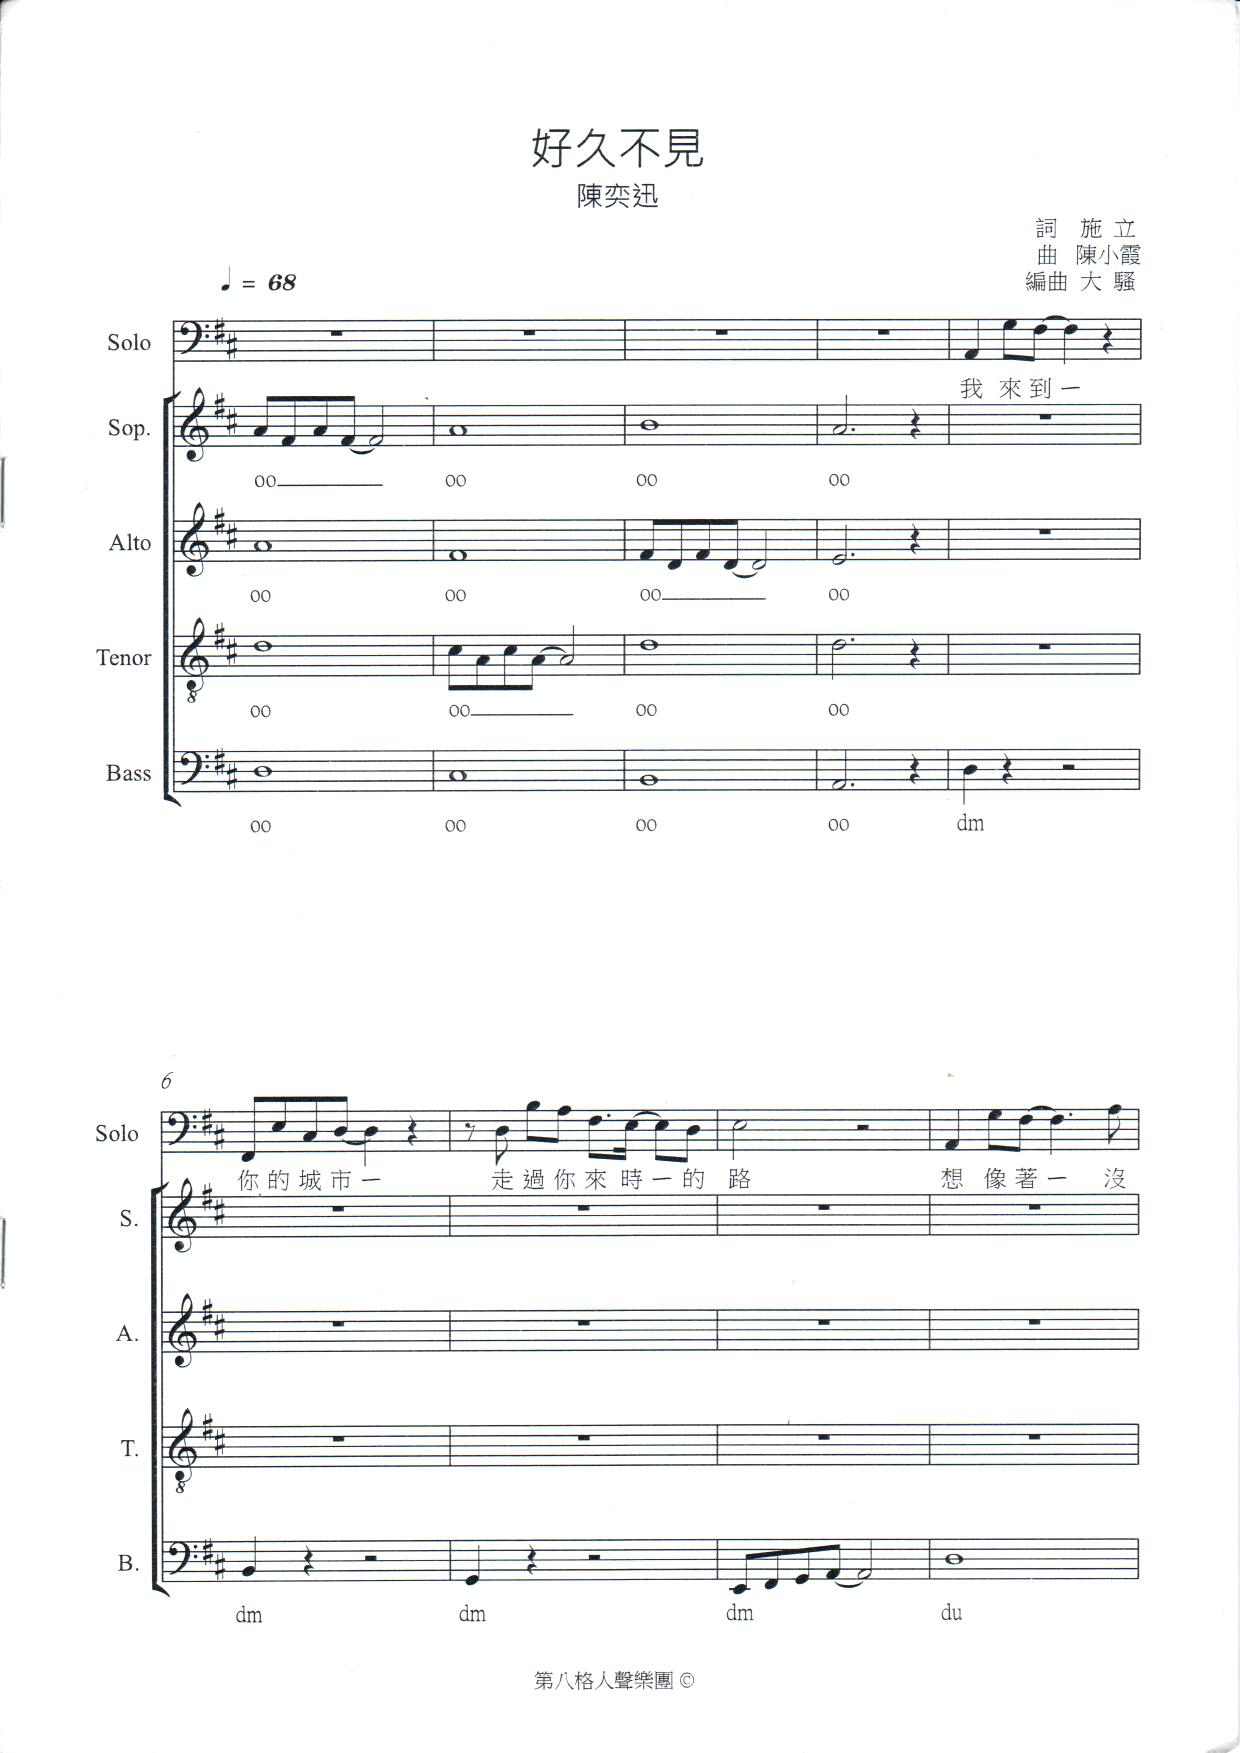

In [1]:
%pylab inline
from IPython.display import Image as IPyImage
import matplotlib.pyplot as plt
from matplotlib import interactive
from scipy import misc
import numpy as np
interactive(True)

path = "../../data/score020.jpg"
IPyImage(filename=path)

In [2]:
import json
import numpy as np
import ScoreAnalyzer as sa

data = sa.load("../../data/score020.jpg", thresh=.2)
info = json.load(open("../../data/centers020.json"))
centers = info["centers"]

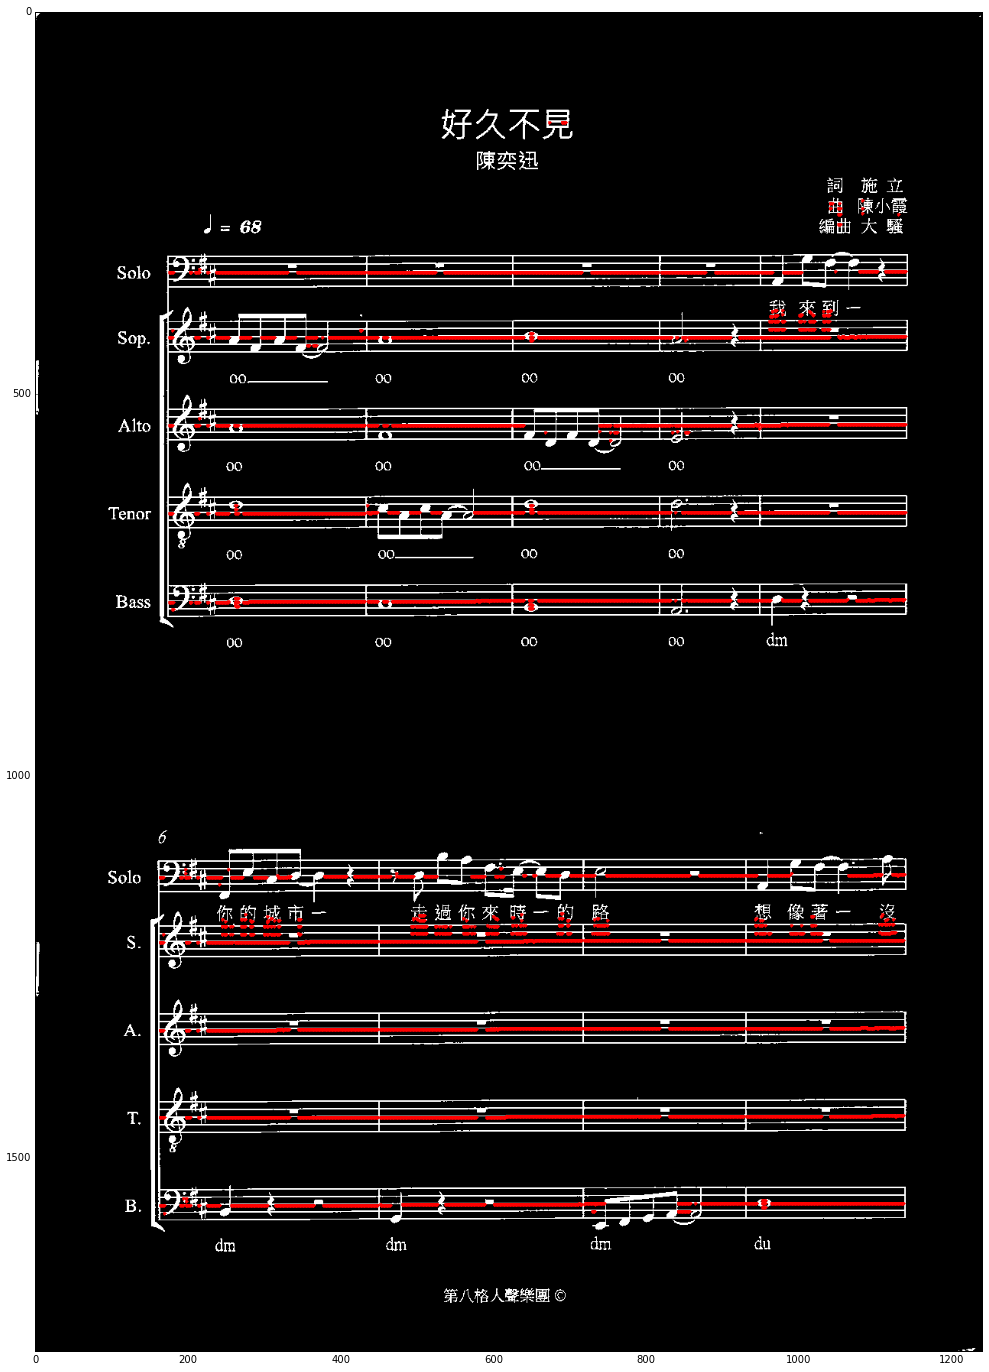

In [3]:
plt.gcf().clear()
for i, center in enumerate(centers):
    plt.plot([i]*len(center), center, 'r.')
    
plt.imshow(1-data, cmap=plt.cm.binary)

plt.gcf().set_size_inches(plt.gcf().get_size_inches()*6)
plt.gcf().set_dpi(300)
plt.show()

In [4]:
cnt = 0
for i, center in enumerate(centers):
    cnt += len(center)

cnt

8387

In [5]:
staves = []
height = 5*info["width"] + 4*info["space"]
height

42

In [6]:
staves = sa.find_lines_RANSAC(centers, img_width=data.shape[1], staffline_height=height, max_iter=500)

In [7]:
staves

[[-0.0025641025641025641, 1332.3487179487179],
 [-0.0020491803278688526, 656.51844262295083],
 [-0.0032154340836012861, 1447.7556270096463],
 [-0.0031645569620253164, 772.79430379746839],
 [0.0, 425.0],
 [0.0, 1215.0],
 [-0.0040160642570281121, 1562.9277108433735],
 [0.0, 340.0],
 [-0.0059880239520958087, 1133.9041916167664],
 [-0.0018621973929236499, 541.39292364990683],
 [0.0, 144.0],
 [-0.0, 257.0]]

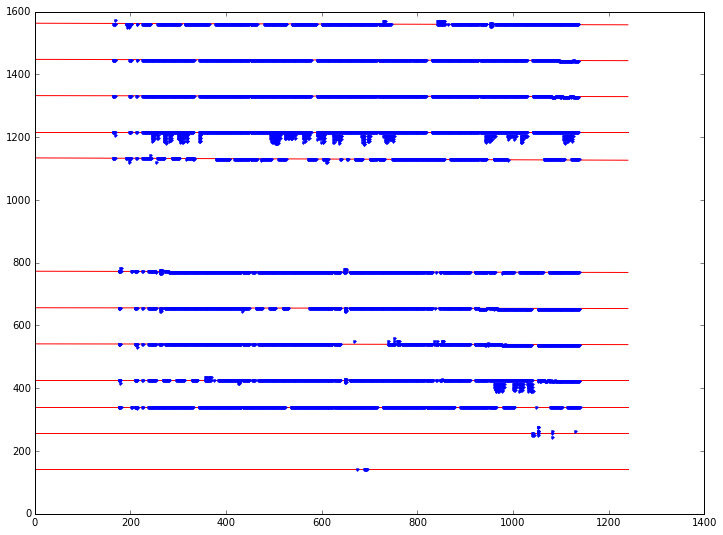

In [8]:
pts = sa._get_pts_set(centers)

xx = np.linspace(0, data.shape[1])
for a, b in staves:
    plt.plot(xx, xx*a + b, 'r')
    
plt.plot(pts[:, 0], pts[:, 1], 'b.')
plt.gcf().set_size_inches(12, 9)
plt.show()
plt.gcf().clear()

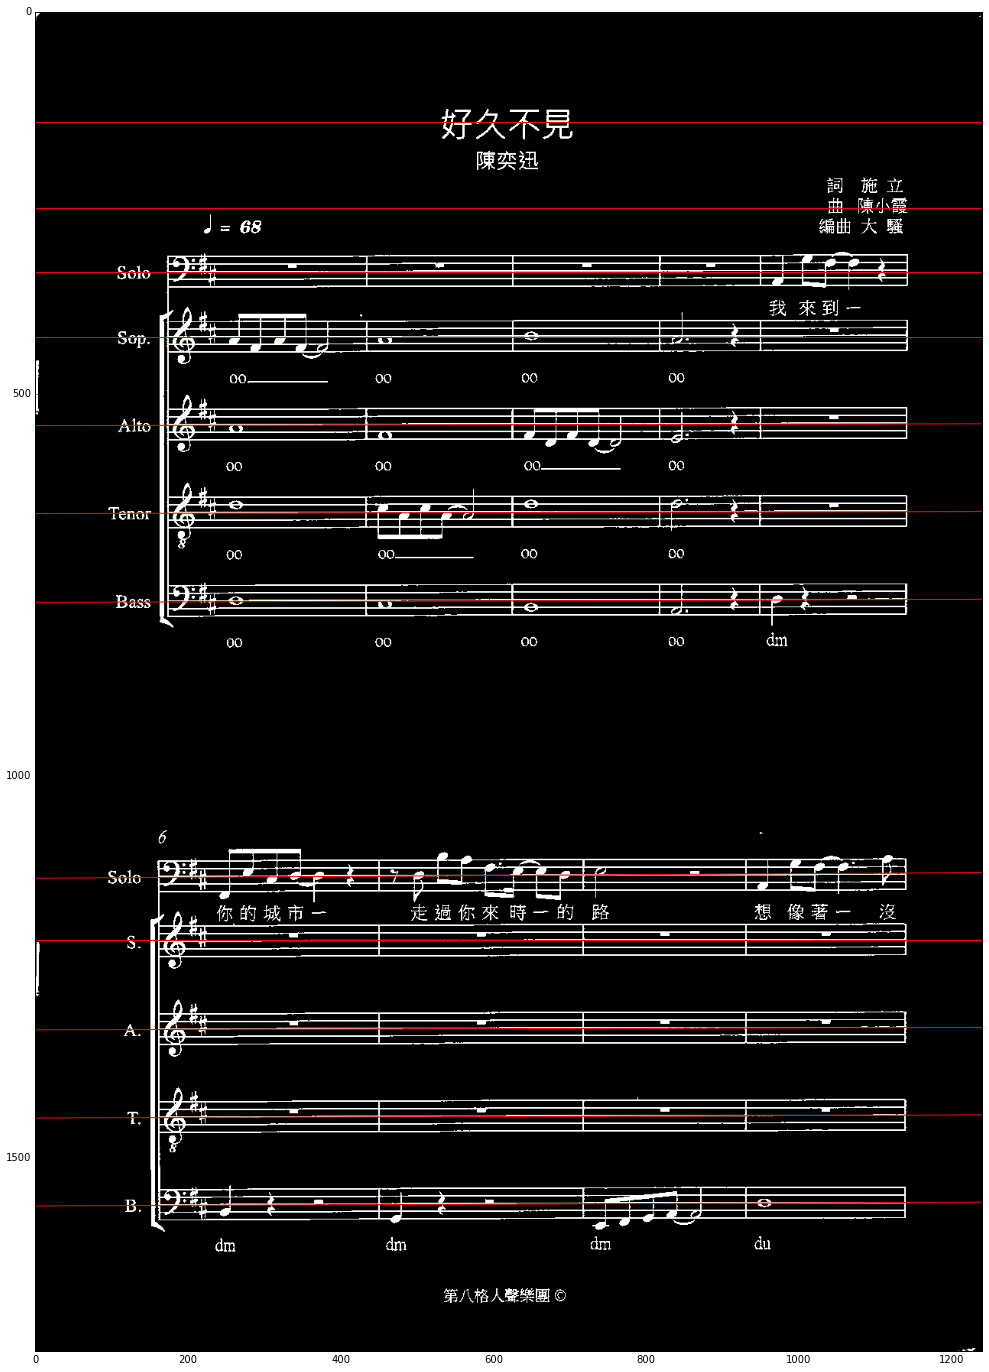

In [9]:
xx = np.linspace(0, data.shape[1])
for a, b in staves:
    plt.plot(xx, xx*a + b, 'r')
    
plt.imshow(1-data, cmap=plt.cm.binary)
plt.gcf().set_size_inches(plt.gcf().get_size_inches()*6)
plt.gcf().set_dpi(300)
plt.show()
plt.gcf().clear()

In [10]:
stafflines = sa.segment_stafflines(data=data, lines_params=staves, margin=2*height, bin_thresh=.2)

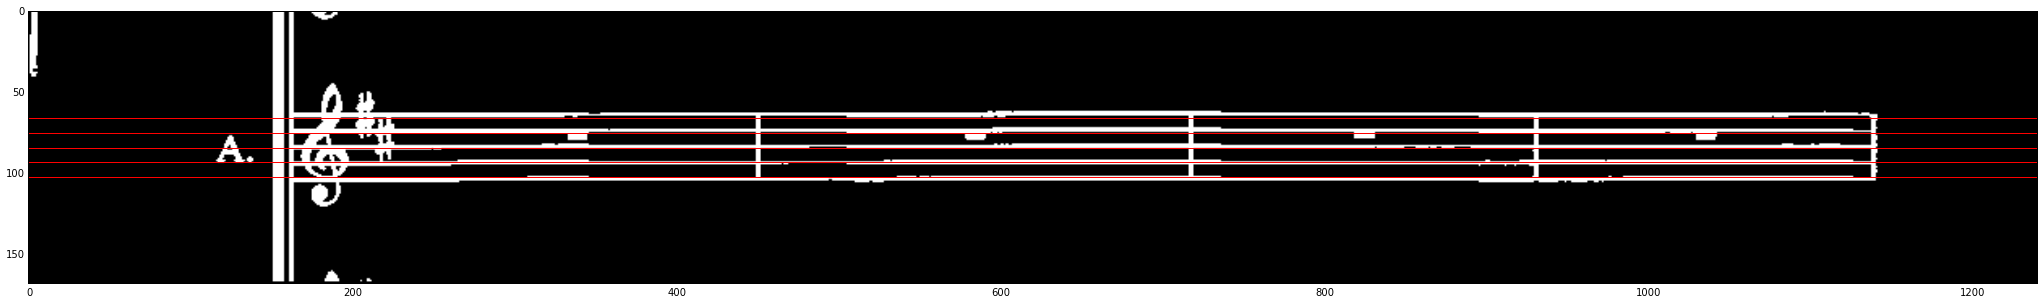

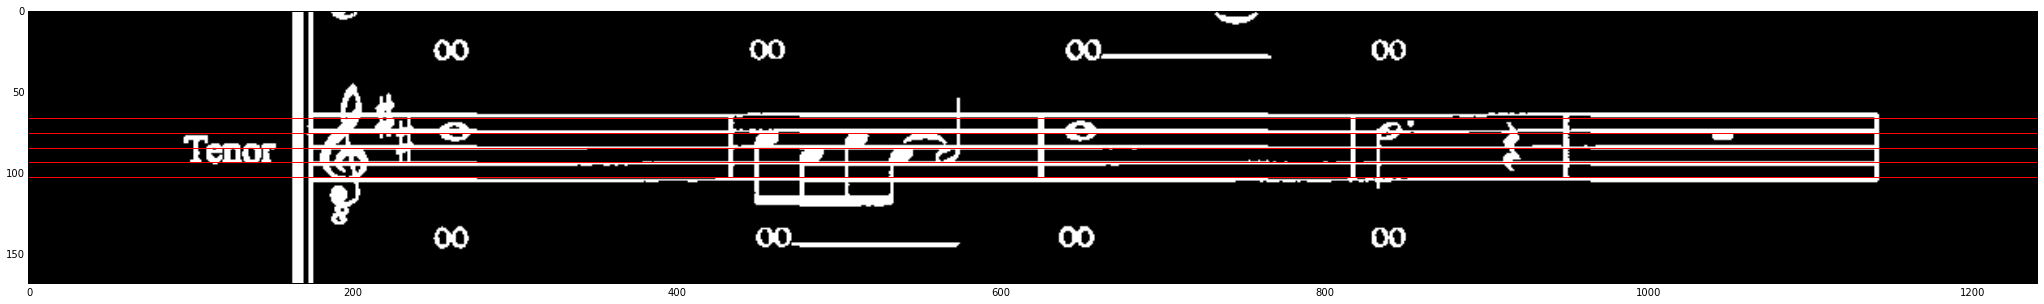

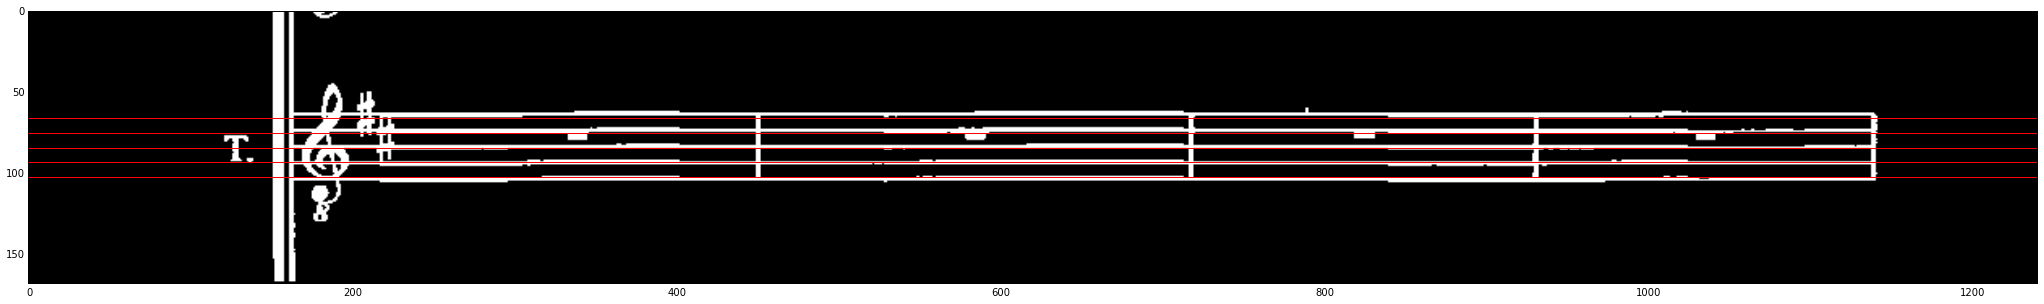

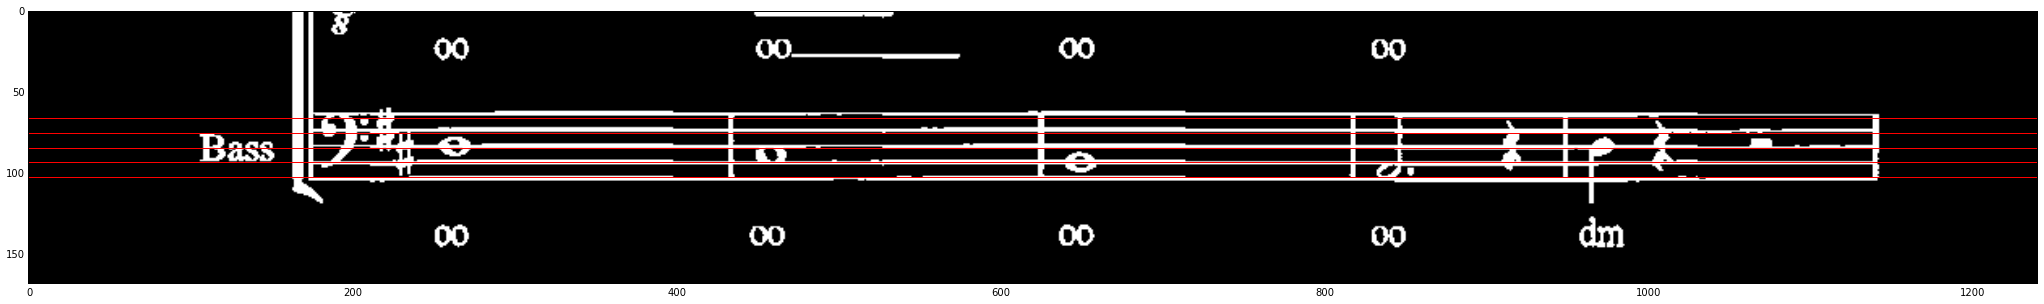

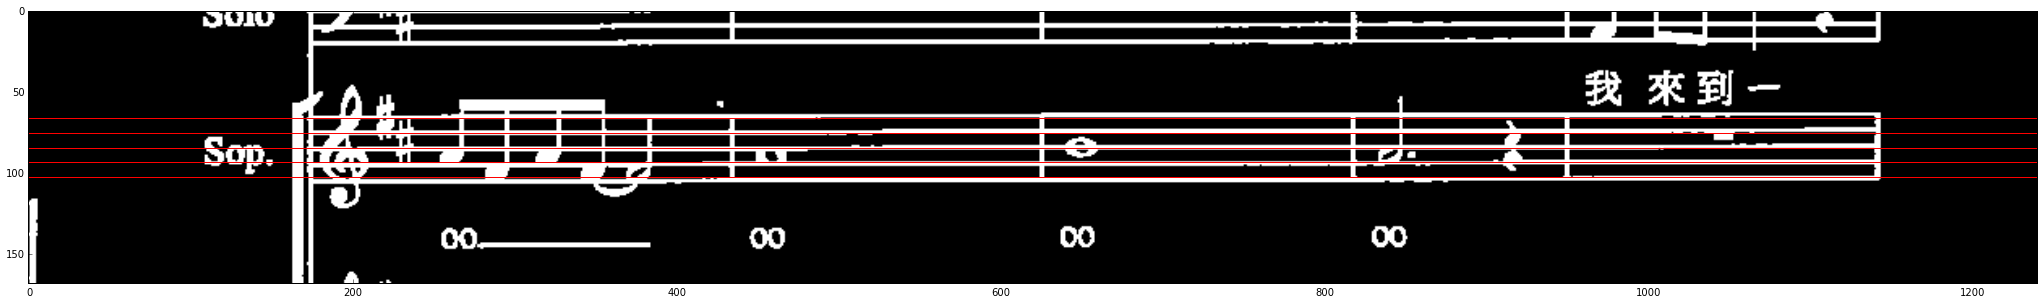

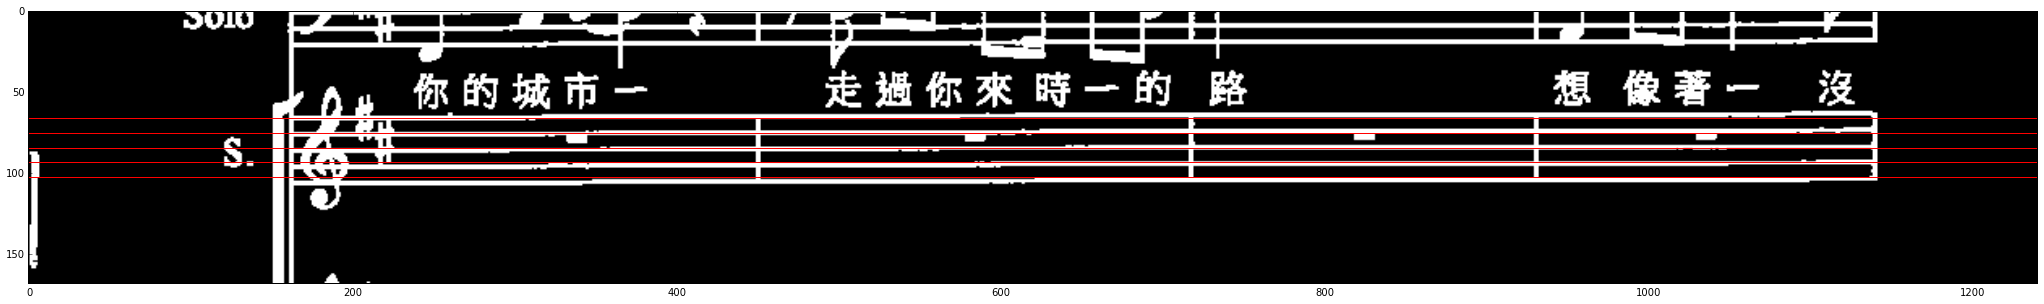

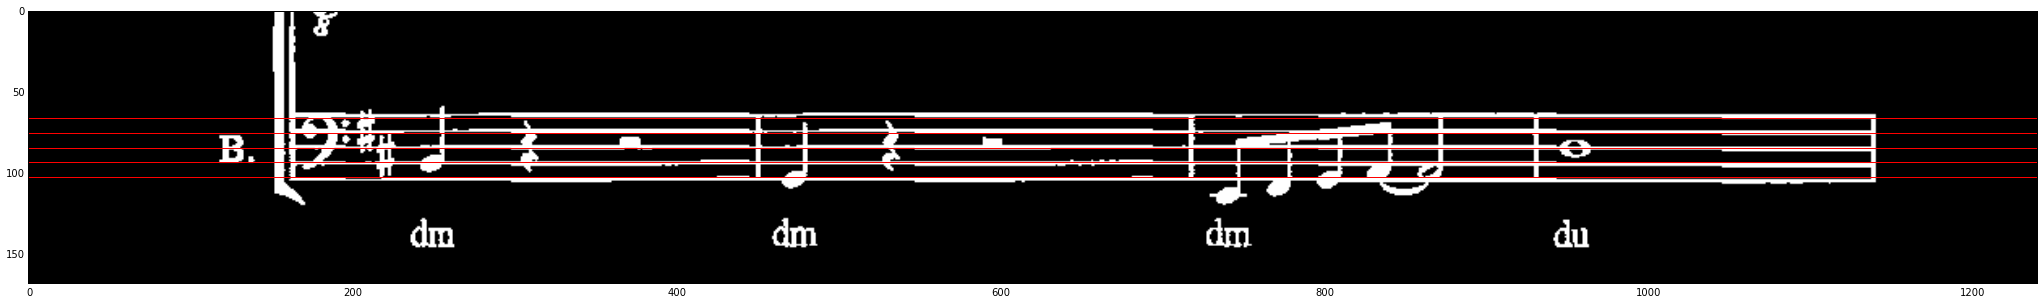

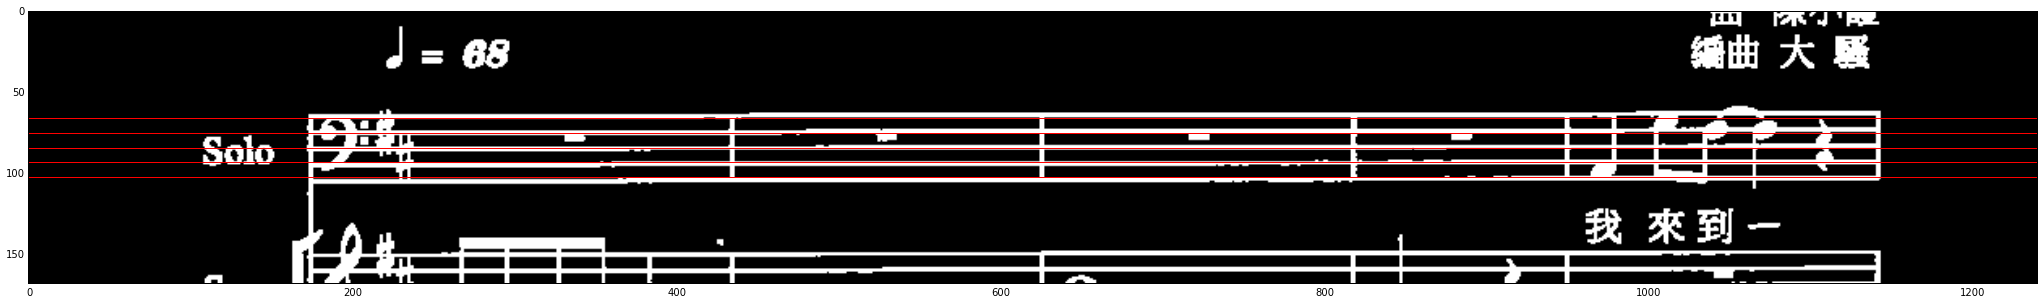

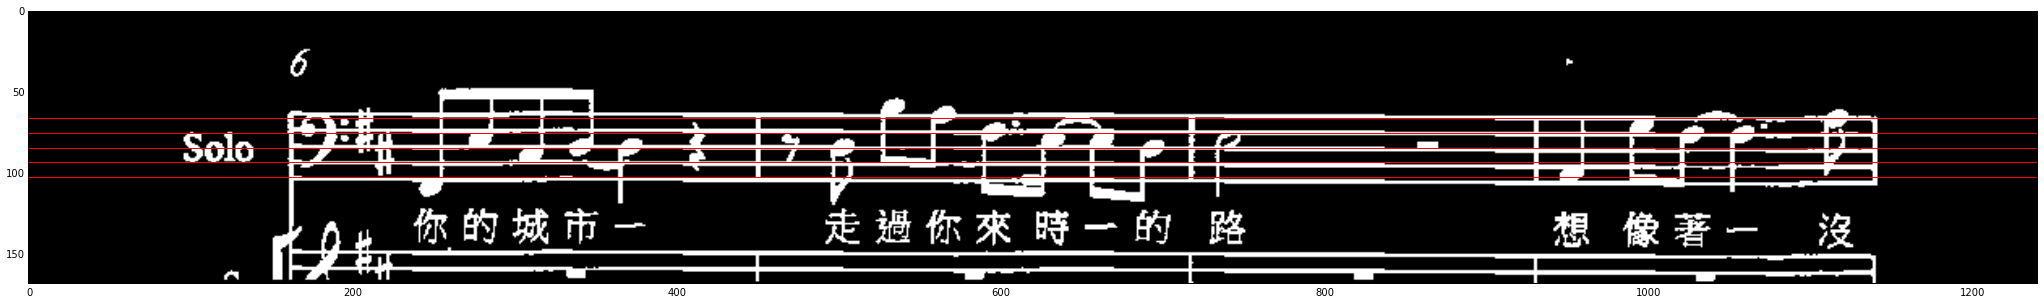

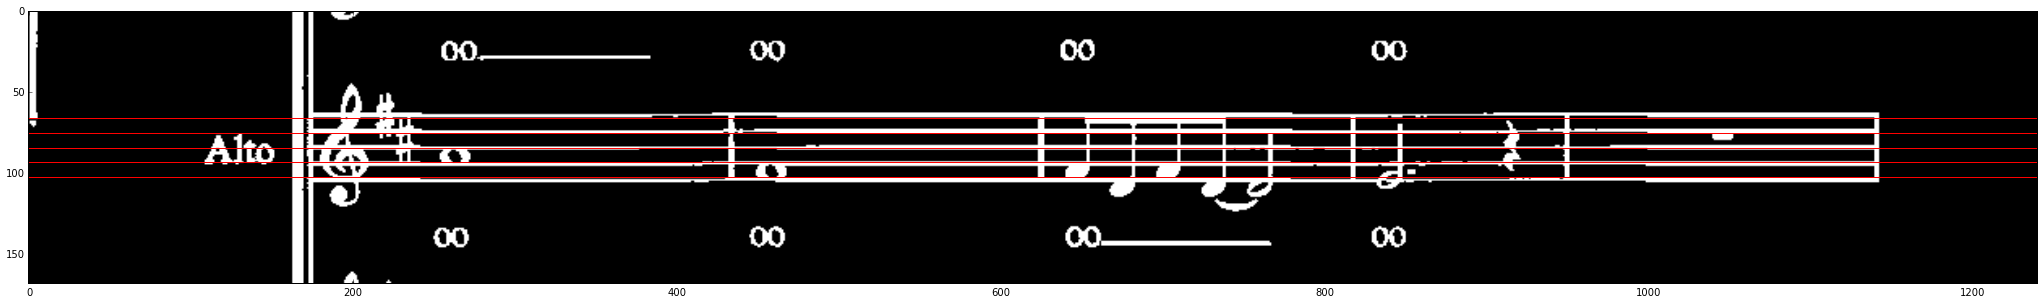

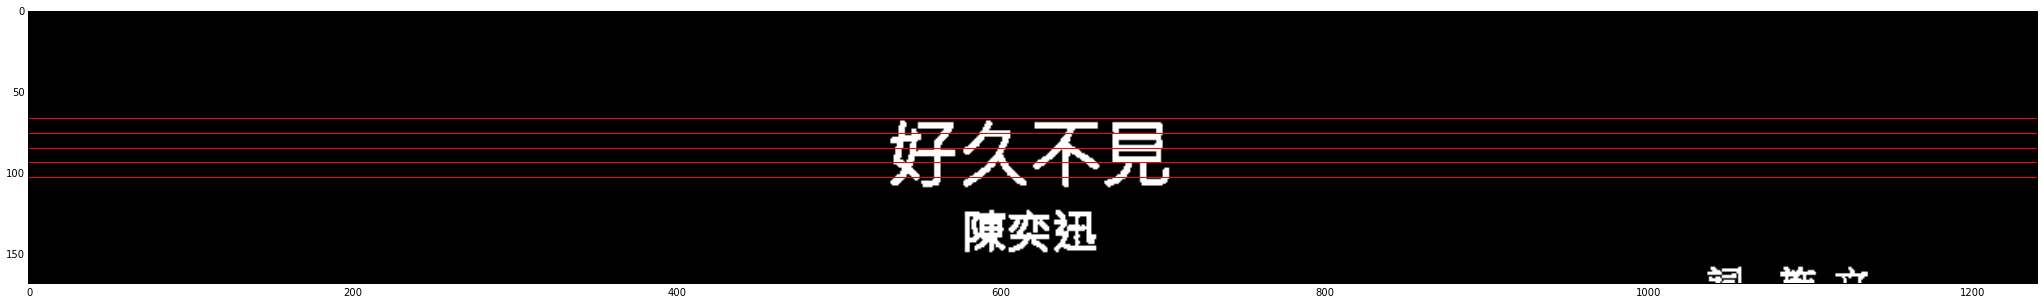

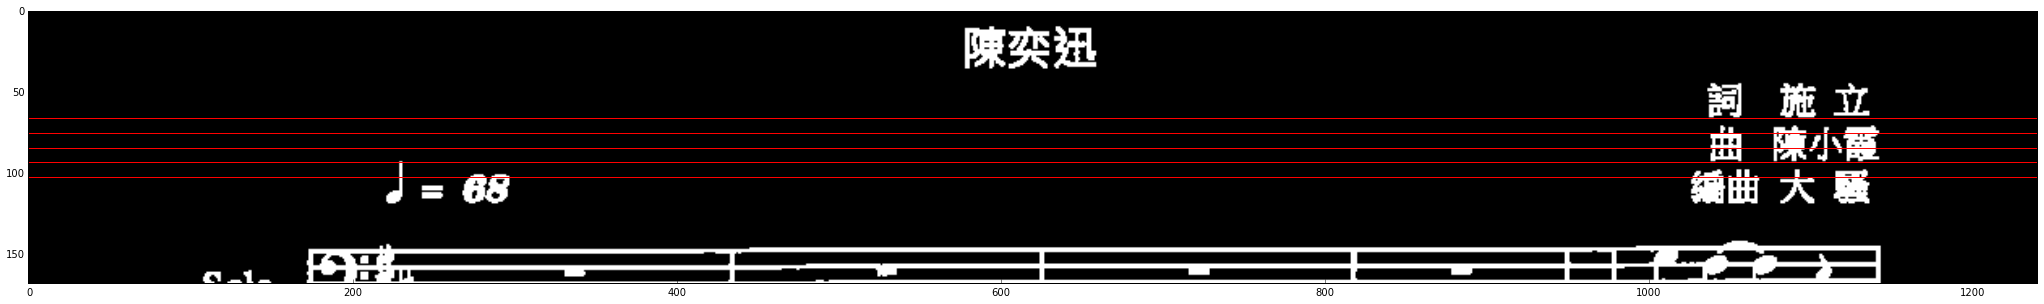

In [11]:
 for staff_seg in stafflines:
    spacing = info["width"]/2. + info["space"]
    for x in range(5):
        plt.plot([0, staff_seg.shape[1]], [staff_seg.shape[0]/2.+(x-2)*spacing] * 2, "r-")

    plt.imshow(1-staff_seg, cmap=plt.cm.binary)
    plt.gcf().set_size_inches(plt.gcf().get_size_inches()*6)
    plt.gcf().set_dpi(300)
    plt.show()
    plt.gcf().clear()